#  RCA for Reducing Overweight and Obesity Rates

#### Introduction and Data Exploration

I was a fat kid. Because of this, the topic of weight loss and maintaining a trim, healthy physique has always been of interest to me. What does it take to get skinny? And more importantly, how does one stay skinny once you've reached your desired weight?

When I stumbled across this [data set](https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system) from Data.gov I was immediately intrigued. It had the percentages of obese and overweight people per state as well as the percentages of how many of them participated in physical exercise and ate a diet that included fruits and vegetables.

My first instinct was to examine the data to see if there were any corrilations between these variables and the rates of people being categorized as either overweight or obese.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
us_health = pd.read_csv('US_Health.csv')

In [3]:
state_names = us_health['LocationDesc'].unique()
health_df = pd.DataFrame(index = state_names)

column_titles = ['% Obese', '% Over Weight', '%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_df(cat_type_1, cat_1):
    temp_df = pd.DataFrame(index = state_names)
    for c, ind in enumerate(us_health['Question'].unique()):
        temp_value = us_health[(us_health['StratificationCategory1']== cat_type_1) 
                               & (us_health['Stratification1']== cat_1)
                               &(us_health['Question']== ind)
                               &(us_health['YearStart']== 2015)][['Data_Value']]
        temp_df[column_titles[c]] = np.array(temp_value['Data_Value'])
    temp_df = temp_df.drop(['National'])
    temp_df['%_Eats_Fruit'] = 100 - temp_df['%_Eats_Fruit']
    temp_df['%_Eats_Veg'] = 100 - temp_df['%_Eats_Veg']
    temp_df['%_Active'] = 100 - temp_df['%_Active']
    temp_df['%_O_And_O'] = temp_df['% Obese'] + temp_df['% Over Weight']
    return temp_df

In [4]:
male_df = create_df('Gender','Male')

In [5]:
plot_y = ['%_Eats_Fruit', '%_Eats_Veg', '%_Lift',
       '%_Min_Cardio', '%_Lift_Cardio', '%_Max_Cardio', '%_Active']
def create_plots(data_frame, weight_class):
    fig = plt.figure(figsize= (16,16))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.regplot(x=data_frame[weight_class] , y=data_frame[col])
    plt.show()

Below are a few scatter plots that demonstrate the corrolation between the various healthy habits and the rates of obesity and overweight classifications for men:

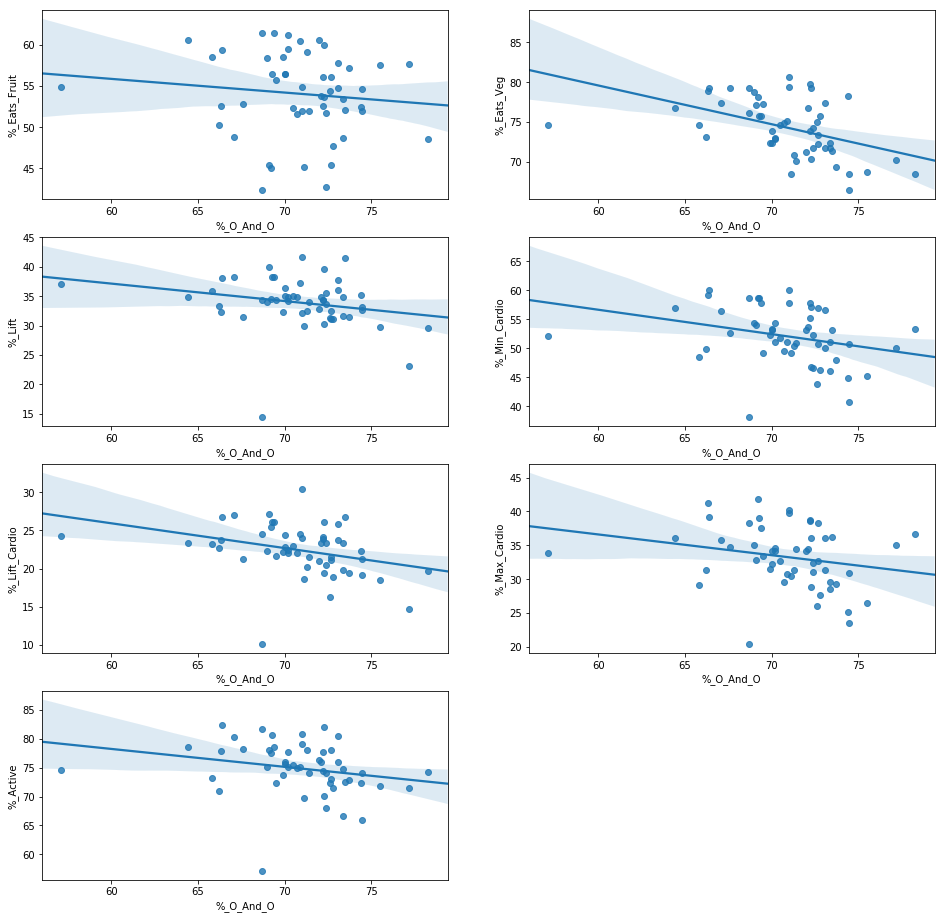

In [6]:
create_plots(male_df, '%_O_And_O')
plt.show()

As you can see, there is a negative correlation between the percentages of obesity/overweight classifications and participiation in healthy eating and exercise habits. So basically, the more men exercised and ate fruits and vegetables, the slimmer they were.

It is startling to note, however, that the range of the x axis goes for 55% to 80%. That means that no state had less than a 55% rate of obesity/overweight classifications. Also, the heavier states that reached close to an 80% rate meant that there are places where almost 8 out of 10 people were obese or overweight. 

A similiar correlation can be found with females:

In [7]:
female_df = create_df('Gender','Female')

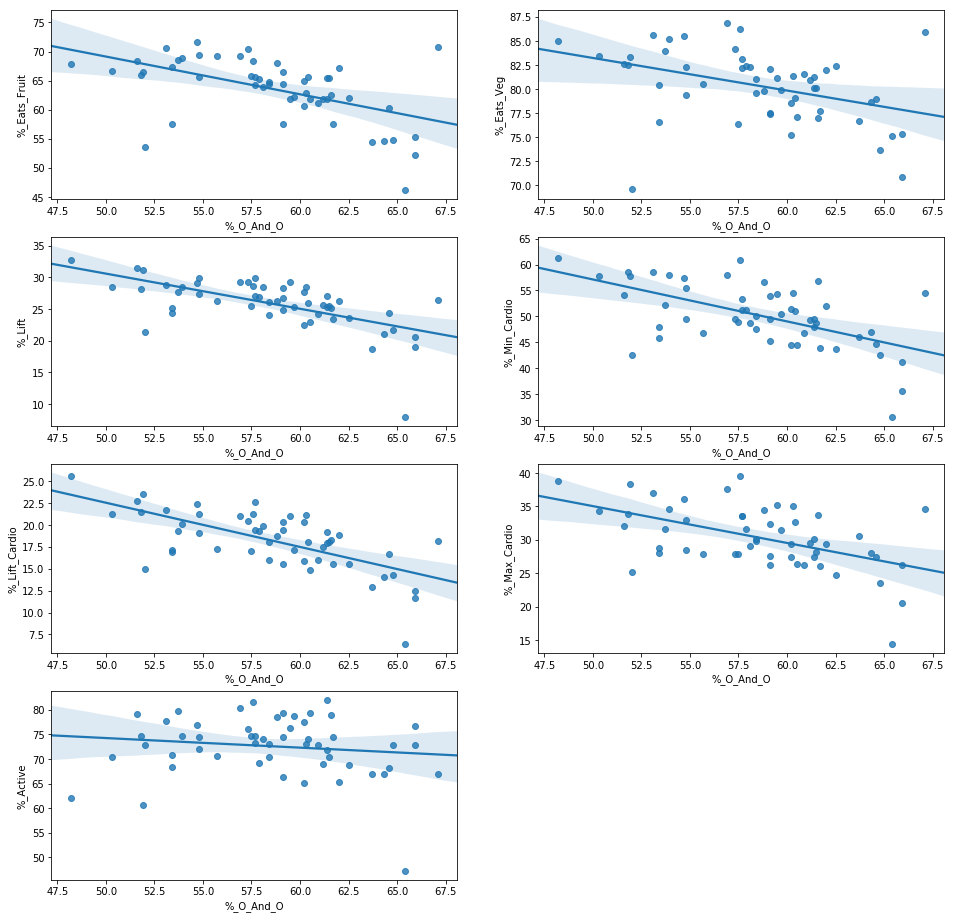

In [8]:
create_plots(female_df,'%_O_And_O')

As with the men, the higher the percentage of women who practice healthy habits, the lower the rates of obesity and overweight conditions.

The range is not as bad as the men topping off just shy of 68 percent. But once again, it is a disturbingly high amount. 

Also, another truly horrifying inferrence can be drawn by looking closely at how the correlations are clustered:

In [9]:
def create_jointplots(data_frame, weight_class):
    fig = plt.figure(figsize= (20,20))
    for num, col in enumerate(plot_y, start =1):
        fig.add_subplot(4,2,num)
        sns.kdeplot(data_frame[weight_class],data_frame[col], shade = True)
    plt.show()

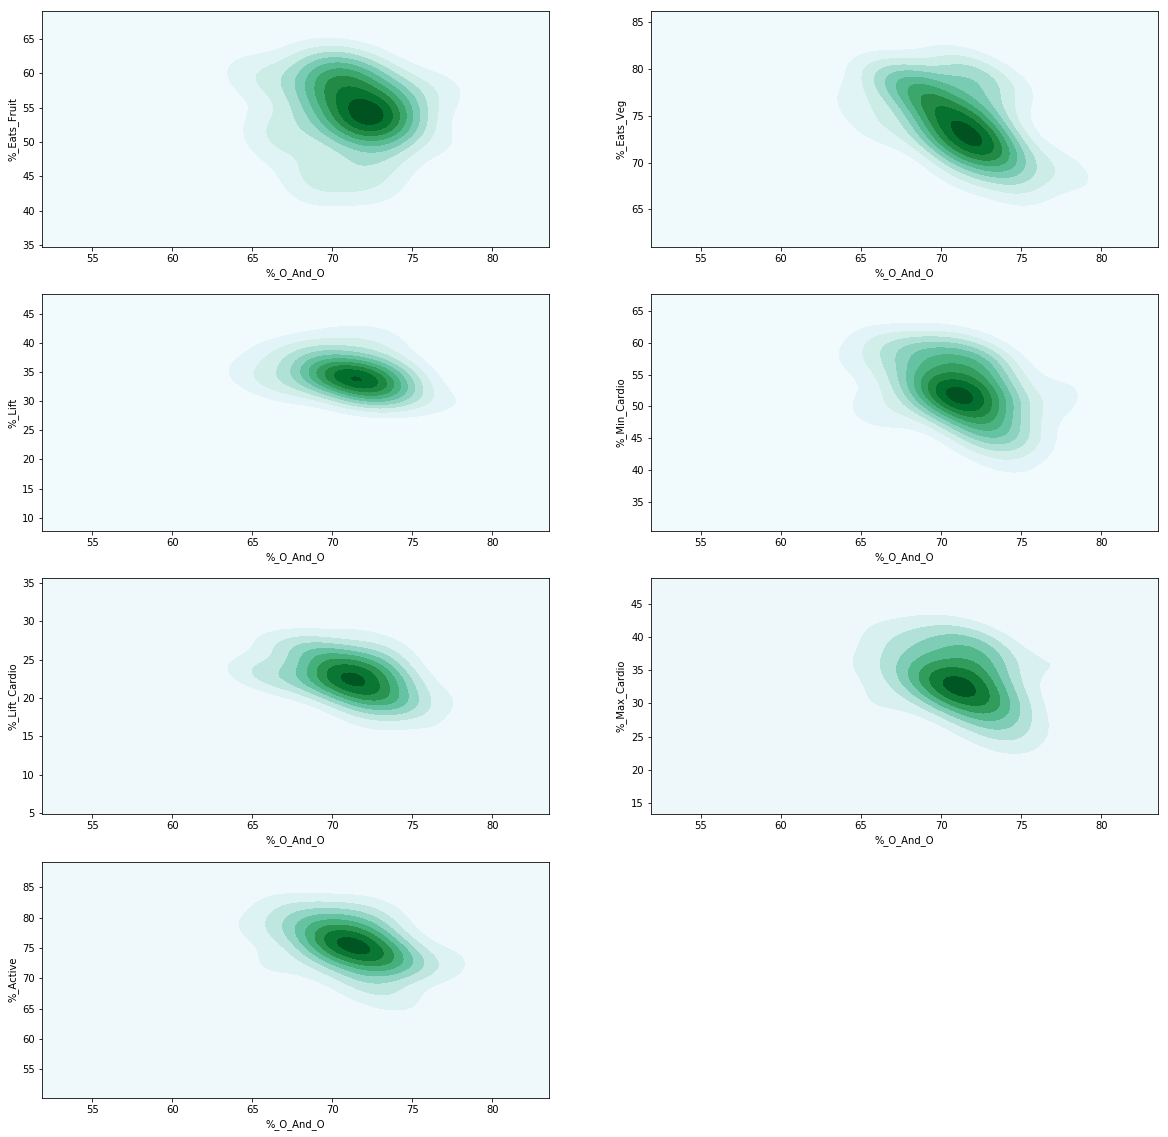

In [10]:
create_jointplots(male_df,'%_O_And_O')

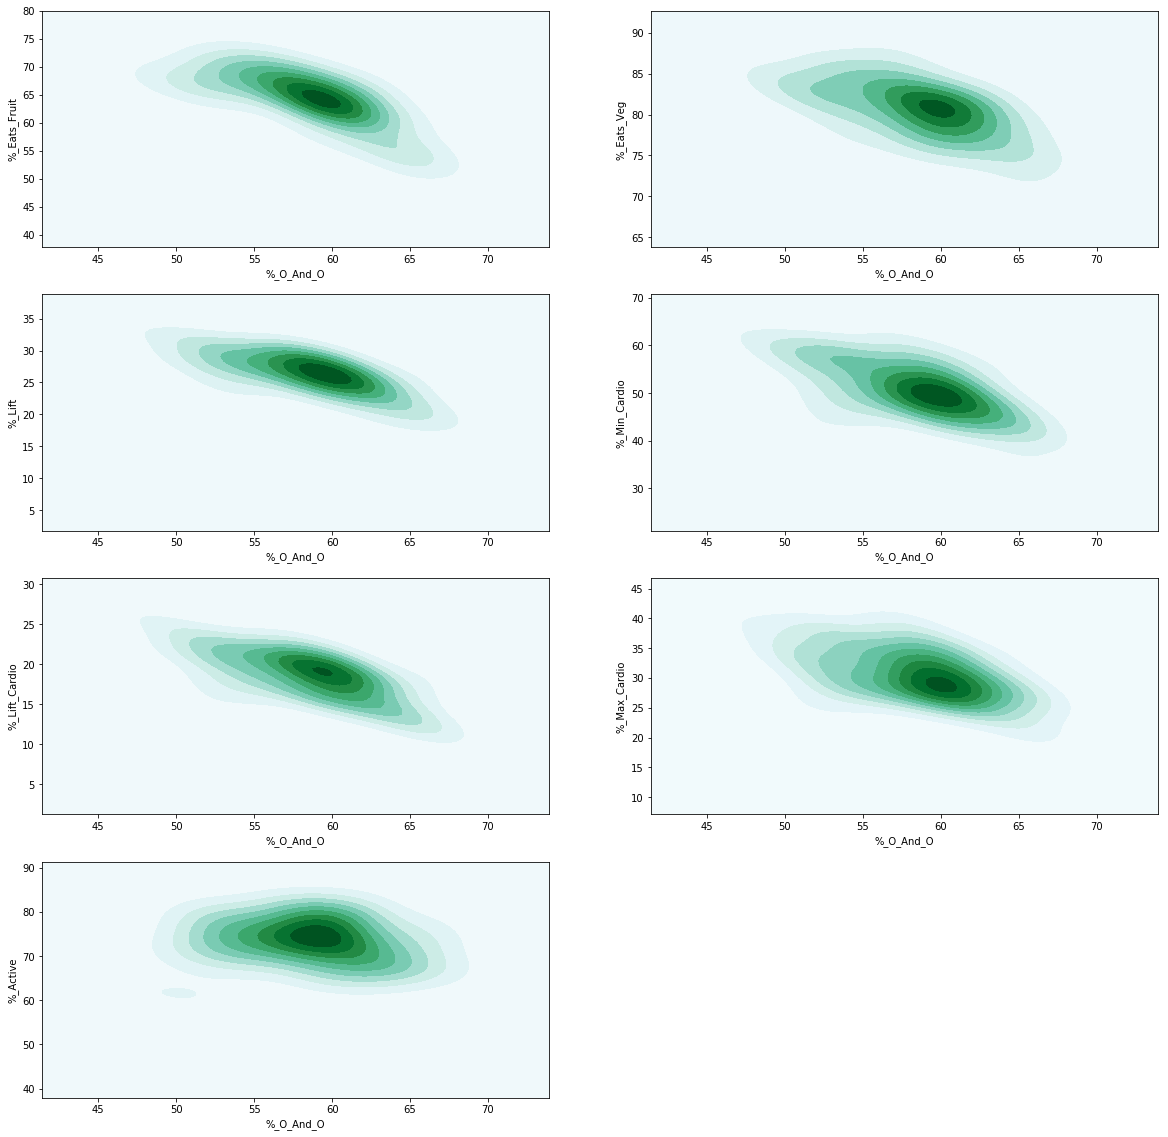

In [11]:
create_jointplots(female_df,'%_O_And_O')

For the men, the high density clusters for those who eat vegetables vs obese/overweight rates is around 70-75% on both axes. So while 70-75% of them do eat vegetables, between 70-75% are still classified as overweight/obese. With the clustering at 80% who eat vegetables vs 60% overweight/obese.

## Conclusions Drawn and Research Proposal

#### The Problem

This study looked at the various factors that could lead to maintaining a healthy body weight. And while there are definite correlations between healthy habits and obesity/overweight classifications, the fact remains that the percentage of overweight and obese people range from 50-80% in every state. 

What would be the best way to bring those percentages down?

#### The Possible Solution

I applaud that this study was done at all, but the glaring piece of data that is missing is probably the most important one: calorie intake. Exactly how much are people eating?

As somebody who exercises consistantly and is a vegetarian, I've come to sadly realize that exercise and eating vegetables aren't enough to maintain a healthy body weight. 

#### The Method of Testing